# <center>Is Technical Analysis Really Profitable?</center>



\section{Introduction}

Technical analysis is a trading tool employed to evaluate securities and attempt to forecast their future movement by analyzing statistics gathered from trading activity, such as price movement and volume. Unlike fundamental analysts who attempt to evaluate a security's intrinsic value, technical analysts focus on charts of price movement and various analytical tools to evaluate a security's strength or weakness and forecast future price changes.



Over the years, numerous technical indicators have been developed by analysts in attempts to accurately forecast future price movements. Some indicators are focused primarily on identifying the current market trend, including support and resistance areas, while others are focused on determining the strength of a trend and the likelihood of its continuation. Commonly used technical indicator, **moving averages**, **exponential moving average** and **moving average convergence divergence** (MACD).



For example, consider a series of daily stock price $S_1,S_2,S_3,...S_10,..$. The moving average with window size k on day t, is computed as 
$$
MA_t(k)=\frac{S_{t-k+1}+S_{t-k+2}+\ldots+S_t}{k}
$$


In pandas, we use rolling method to compute moving average. Please google the details.  

EMA on day t with window size k, is 
$$
EMA_t(k)=\frac{S_t+(1-\alpha)S_{t-1}+(1-\alpha)^2S_{t-2}+(1-\alpha)^{k-1}S_{t-k+1}}{1+(1-\alpha)+(1-\alpha)^2+\ldots+(1-\alpha)^{k-1}}
$$
with $\alpha=\frac{2}{k+1}$. Basically $EMA$ is weighted average which puts more weight on recent price.

The computation of MACD is straight forward which is the difference of two EMA with different time window.
$$
MACD_t(k_1,k_2)=EMA_t(k_1)-EMA_t(k_2)
$$
In pradctice, we use $MACD_t(12,26)$, that, we use EMA with window size 12 and 26 to compute MACD.

In this project, you need to computer whether there is any association between price change $\Delta_t$:
$$
\Delta_t=S_{t+1}-S_t
$$
and three indicators $MA_t,EMA_t MACD_t$.

# Problem 1. 
Dowload last 4 years ' daily stock price for Apple. 

In [1]:
from googlefinance.client import get_price_data
import datetime
import pandas as pd
import numpy as np
djia_param = {
    'q': "AAPL", # Stock symbol =
    'i': "86400", # Interval size in seconds ("86400" = 1 day intervals)
    'x': "NASDAQ", # Stock exchange symbol
    'p': "4Y" # Period
}
# get price data (return pandas dataframe)
djia = get_price_data(djia_param)
dte=[]
#The following loop is to keep the date and delete time 
for l in range(len(djia.index.values)):
    h=str(djia.index.values[l])[:10]
    h=(datetime.datetime(int(h[:4]),int(h[5:7]),int(h[8:10])).date())
    dte.append(h)
djia.index=dte
apple=pd.DataFrame()
apple['Price']=djia['Close']
apple.head()

,Price
2013-10-18,72.0700
2013-10-19,72.7000
2013-10-22,74.4800
2013-10-23,74.2668
2013-10-24,74.9900


In [2]:
apple.isnull().sum()

Price    0
dtype: int64

# Problem 2.  

Compute $\Delta_t$, $MA_t(12)$, $MA_t(26)$, $EMA_t(12),EMA_t(26),MACD_t(12,26)$




In [3]:
apple['Delta_t']=apple['Price'].shift(-1)-apple['Price']
apple.head()

,Price,Delta_t
2013-10-18,72.0700,0.6300
2013-10-19,72.7000,1.7800
2013-10-22,74.4800,-0.2132
2013-10-23,74.2668,0.7232
2013-10-24,74.9900,1.0000


In [4]:
# computing ema 26
alpha=2/(26+2)
apple['Lag0']=apple['Price']
apple['Lag1']=(1-alpha)*apple['Price'].shift(1)
apple['Lag2']=(1-alpha)**2*apple['Price'].shift(2)
apple['Lag3']=(1-alpha)**3*apple['Price'].shift(3)
apple['Lag4']=(1-alpha)**4*apple['Price'].shift(4)
apple['Lag5']=(1-alpha)**5*apple['Price'].shift(5)
apple['Lag6']=(1-alpha)**6*apple['Price'].shift(6)
apple['Lag7']=(1-alpha)**7*apple['Price'].shift(7)
apple['Lag8']=(1-alpha)**8*apple['Price'].shift(8)
apple['Lag9']=(1-alpha)**9*apple['Price'].shift(9)
apple['Lag10']=(1-alpha)**10*apple['Price'].shift(10)
apple['Lag11']=(1-alpha)**11*apple['Price'].shift(11)
apple['Lag12']=(1-alpha)**12*apple['Price'].shift(12)
apple['Lag13']=(1-alpha)**13*apple['Price'].shift(13)
apple['Lag14']=(1-alpha)**14*apple['Price'].shift(14)
apple['Lag15']=(1-alpha)**15*apple['Price'].shift(15)
apple['Lag16']=(1-alpha)**16*apple['Price'].shift(16)
apple['Lag17']=(1-alpha)**17*apple['Price'].shift(17)
apple['Lag18']=(1-alpha)**18*apple['Price'].shift(18)
apple['Lag19']=(1-alpha)**19*apple['Price'].shift(19)
apple['Lag20']=(1-alpha)**20*apple['Price'].shift(20)
apple['Lag21']=(1-alpha)**21*apple['Price'].shift(21)
apple['Lag22']=(1-alpha)**22*apple['Price'].shift(22)
apple['Lag23']=(1-alpha)**23*apple['Price'].shift(23)
apple['Lag24']=(1-alpha)**24*apple['Price'].shift(24)
apple['Lag25']=(1-alpha)**25*apple['Price'].shift(25)

In [5]:
print(np.cumprod(np.ones(26)))

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.]


In [6]:

aa=np.ones(26)
print(aa)
aa[1:]=aa[1:]*(1-alpha)
print(aa)
aacum=np.cumprod(aa)
# cumprod: cumulative product of elements along a given axis
print(aacum)

apple['ema26']=apple.iloc[:,2:28].sum(axis=1)/aacum.sum()
# axis=1 means sum it horizontally 
apple.head()

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.]
[ 1.          0.92857143  0.92857143  0.92857143  0.92857143  0.92857143
  0.92857143  0.92857143  0.92857143  0.92857143  0.92857143  0.92857143
  0.92857143  0.92857143  0.92857143  0.92857143  0.92857143  0.92857143
  0.92857143  0.92857143  0.92857143  0.92857143  0.92857143  0.92857143
  0.92857143  0.92857143]
[ 1.          0.92857143  0.8622449   0.80065598  0.74346626  0.69036153
  0.64104999  0.59526071  0.55274209  0.51326051  0.47659904  0.44255625
  0.41094509  0.38159187  0.35433531  0.32902565  0.30552381  0.28370068
  0.26343635  0.24461947  0.22714665  0.21092189  0.19585604  0.18186632
  0.16887587  0.15681331]


,Price,Delta_t,Lag0,Lag1,Lag2,Lag3,Lag4,Lag5,Lag6,Lag7,...,Lag17,Lag18,Lag19,Lag20,Lag21,Lag22,Lag23,Lag24,Lag25,ema26
2013-10-18,72.0700,0.6300,72.0700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.025201
2013-10-19,72.7000,1.7800,72.7000,66.922143,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.672699
2013-10-22,74.4800,-0.2132,74.4800,67.507143,62.141990,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.065617
2013-10-23,74.2668,0.7232,74.2668,69.160000,62.685204,57.703276,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.055502
2013-10-24,74.9900,1.0000,74.9900,68.962029,64.220000,58.207690,53.581614,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.749428


In [7]:
# computing mv 26
alpha=0
apple['Lag0']=apple['Price']
apple['Lag1']=(1-alpha)*apple['Price'].shift(1)
apple['Lag2']=(1-alpha)**2*apple['Price'].shift(2)
apple['Lag3']=(1-alpha)**3*apple['Price'].shift(3)
apple['Lag4']=(1-alpha)**4*apple['Price'].shift(4)
apple['Lag5']=(1-alpha)**5*apple['Price'].shift(5)
apple['Lag6']=(1-alpha)**6*apple['Price'].shift(6)
apple['Lag7']=(1-alpha)**7*apple['Price'].shift(7)
apple['Lag8']=(1-alpha)**8*apple['Price'].shift(8)
apple['Lag9']=(1-alpha)**9*apple['Price'].shift(9)
apple['Lag10']=(1-alpha)**10*apple['Price'].shift(10)
apple['Lag11']=(1-alpha)**11*apple['Price'].shift(11)
apple['Lag12']=(1-alpha)**12*apple['Price'].shift(12)
apple['Lag13']=(1-alpha)**13*apple['Price'].shift(13)
apple['Lag14']=(1-alpha)**14*apple['Price'].shift(14)
apple['Lag15']=(1-alpha)**15*apple['Price'].shift(15)
apple['Lag16']=(1-alpha)**16*apple['Price'].shift(16)
apple['Lag17']=(1-alpha)**17*apple['Price'].shift(17)
apple['Lag18']=(1-alpha)**18*apple['Price'].shift(18)
apple['Lag19']=(1-alpha)**19*apple['Price'].shift(19)
apple['Lag20']=(1-alpha)**20*apple['Price'].shift(20)
apple['Lag21']=(1-alpha)**21*apple['Price'].shift(21)
apple['Lag22']=(1-alpha)**22*apple['Price'].shift(22)
apple['Lag23']=(1-alpha)**23*apple['Price'].shift(23)
apple['Lag24']=(1-alpha)**24*apple['Price'].shift(24)
apple['Lag25']=(1-alpha)**25*apple['Price'].shift(25)
apple['ma26']=apple.iloc[:,2:28].sum(axis=1)/26
# apple
apple.iloc[:,2:28]

,Lag0,Lag1,Lag2,Lag3,Lag4,Lag5,Lag6,Lag7,Lag8,Lag9,...,Lag16,Lag17,Lag18,Lag19,Lag20,Lag21,Lag22,Lag23,Lag24,Lag25
2013-10-18,72.0700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-19,72.7000,72.0700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-22,74.4800,72.7000,72.0700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-23,74.2668,74.4800,72.7000,72.0700,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-24,74.9900,74.2668,74.4800,72.7000,72.0700,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-25,75.9900,74.9900,74.2668,74.4800,72.7000,72.0700,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-26,75.1370,75.9900,74.9900,74.2668,74.4800,72.7000,72.0700,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-29,75.6970,75.1370,75.9900,74.9900,74.2668,74.4800,72.7000,72.0700,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-30,73.8110,75.6970,75.1370,75.9900,74.9900,74.2668,74.4800,72.7000,72.0700,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-31,74.9850,73.8110,75.6970,75.1370,75.9900,74.9900,74.2668,74.4800,72.7000,72.0700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# computing ema 12
alpha=2/(12+2)
apple['Lag0']=apple['Price']
apple['Lag1']=(1-alpha)*apple['Price'].shift(1)
apple['Lag2']=(1-alpha)**2*apple['Price'].shift(2)
apple['Lag3']=(1-alpha)**3*apple['Price'].shift(3)
apple['Lag4']=(1-alpha)**4*apple['Price'].shift(4)
apple['Lag5']=(1-alpha)**5*apple['Price'].shift(5)
apple['Lag6']=(1-alpha)**6*apple['Price'].shift(6)
apple['Lag7']=(1-alpha)**7*apple['Price'].shift(7)
apple['Lag8']=(1-alpha)**8*apple['Price'].shift(8)
apple['Lag9']=(1-alpha)**9*apple['Price'].shift(9)
apple['Lag10']=(1-alpha)**10*apple['Price'].shift(10)
apple['Lag11']=(1-alpha)**11*apple['Price'].shift(11)
apple['Lag12']=(1-alpha)**12*apple['Price'].shift(12)
apple['Lag13']=(1-alpha)**13*apple['Price'].shift(13)
apple['Lag14']=(1-alpha)**14*apple['Price'].shift(14)
apple['Lag15']=(1-alpha)**15*apple['Price'].shift(15)
apple['Lag16']=(1-alpha)**16*apple['Price'].shift(16)
apple['Lag17']=(1-alpha)**17*apple['Price'].shift(17)
apple['Lag18']=(1-alpha)**18*apple['Price'].shift(18)
apple['Lag19']=(1-alpha)**19*apple['Price'].shift(19)
apple['Lag20']=(1-alpha)**20*apple['Price'].shift(20)
apple['Lag21']=(1-alpha)**21*apple['Price'].shift(21)
apple['Lag22']=(1-alpha)**22*apple['Price'].shift(22)
apple['Lag23']=(1-alpha)**23*apple['Price'].shift(23)
apple['Lag24']=(1-alpha)**24*apple['Price'].shift(24)
apple['Lag25']=(1-alpha)**25*apple['Price'].shift(25)
aa=np.ones(12)
aa[1:]=aa[1:]*(1-alpha)
aacum=np.cumprod(aa)
apple['ema12']=apple.iloc[:,2:14].sum(axis=1)/aacum.sum()
apple

,Price,Delta_t,Lag0,Lag1,Lag2,Lag3,Lag4,Lag5,Lag6,Lag7,...,Lag19,Lag20,Lag21,Lag22,Lag23,Lag24,Lag25,ema26,ma26,ema12
2013-10-18,72.0700,0.6300,72.0700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.025201,2.771923,12.217059
2013-10-19,72.7000,1.7800,72.7000,61.774286,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.672699,5.568077,22.795618
2013-10-22,74.4800,-0.2132,74.4800,62.314286,52.949388,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.065617,8.432692,32.164695
2013-10-23,74.2668,0.7232,74.2668,63.840000,53.412245,45.385190,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.055502,11.289108,40.159191
2013-10-24,74.9900,1.0000,74.9900,63.657257,54.720000,45.781924,38.901591,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.749428,14.173338,47.134211
2013-10-25,75.9900,-0.8530,75.9900,64.277143,54.563363,46.902857,39.241649,33.344221,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.191676,17.096031,53.282315
2013-10-26,75.1370,0.5600,75.1370,65.134286,55.094694,46.768597,40.202449,33.635699,28.580761,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.245307,19.985915,58.407522
2013-10-29,75.6970,-1.8860,75.6970,64.403143,55.829388,47.224023,40.087369,34.459242,28.830599,24.497795,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.056211,22.897338,62.895485
2013-10-30,73.8110,1.1740,73.8110,64.883143,55.202694,47.853761,40.477734,34.360602,29.536493,24.711942,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.437233,25.736223,66.422603
2013-10-31,74.9850,-0.3130,74.9850,63.266571,55.614122,47.316595,41.017509,34.695201,29.451945,25.316994,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.674903,28.620262,69.644859


In [9]:
# computing ma 12
alpha=0
apple['Lag0']=apple['Price']
apple['Lag1']=(1-alpha)*apple['Price'].shift(1)
apple['Lag2']=(1-alpha)**2*apple['Price'].shift(2)
apple['Lag3']=(1-alpha)**3*apple['Price'].shift(3)
apple['Lag4']=(1-alpha)**4*apple['Price'].shift(4)
apple['Lag5']=(1-alpha)**5*apple['Price'].shift(5)
apple['Lag6']=(1-alpha)**6*apple['Price'].shift(6)
apple['Lag7']=(1-alpha)**7*apple['Price'].shift(7)
apple['Lag8']=(1-alpha)**8*apple['Price'].shift(8)
apple['Lag9']=(1-alpha)**9*apple['Price'].shift(9)
apple['Lag10']=(1-alpha)**10*apple['Price'].shift(10)
apple['Lag11']=(1-alpha)**11*apple['Price'].shift(11)
apple['Lag12']=(1-alpha)**12*apple['Price'].shift(12)
apple['Lag13']=(1-alpha)**13*apple['Price'].shift(13)
apple['Lag14']=(1-alpha)**14*apple['Price'].shift(14)
apple['Lag15']=(1-alpha)**15*apple['Price'].shift(15)
apple['Lag16']=(1-alpha)**16*apple['Price'].shift(16)
apple['Lag17']=(1-alpha)**17*apple['Price'].shift(17)
apple['Lag18']=(1-alpha)**18*apple['Price'].shift(18)
apple['Lag19']=(1-alpha)**19*apple['Price'].shift(19)
apple['Lag20']=(1-alpha)**20*apple['Price'].shift(20)
apple['Lag21']=(1-alpha)**21*apple['Price'].shift(21)
apple['Lag22']=(1-alpha)**22*apple['Price'].shift(22)
apple['Lag23']=(1-alpha)**23*apple['Price'].shift(23)
apple['Lag24']=(1-alpha)**24*apple['Price'].shift(24)
apple['Lag25']=(1-alpha)**25*apple['Price'].shift(25)

apple['ma12']=apple.iloc[:,2:14].sum(axis=1)/12
apple.head()
apple['MACD']=apple['ema12']-apple['ema26']
apple=apple.dropna()
apple.head()

,Price,Delta_t,Lag0,Lag1,Lag2,Lag3,Lag4,Lag5,Lag6,Lag7,...,Lag21,Lag22,Lag23,Lag24,Lag25,ema26,ma26,ema12,ma12,MACD
2013-11-22,74.4480,-0.1880,74.4480,73.570,74.220,74.090,74.999,75.450,74.376,74.290,...,74.990,74.2668,74.4800,72.7000,72.0700,74.421378,74.423031,74.305168,74.299667,-0.116210
2013-11-23,74.2600,0.5600,74.2600,74.448,73.570,74.220,74.090,74.999,75.450,74.376,...,75.990,74.9900,74.2668,74.4800,72.7000,74.436511,74.507262,74.294450,74.286333,-0.142061
2013-11-26,74.8200,1.3800,74.8200,74.260,74.448,73.570,74.220,74.090,74.999,75.450,...,75.137,75.9900,74.9900,74.2668,74.4800,74.489711,74.588800,74.412370,74.420250,-0.077341
2013-11-27,76.2000,1.7943,76.2000,74.820,74.260,74.448,73.570,74.220,74.090,74.999,...,75.697,75.1370,75.9900,74.9900,74.2668,74.632813,74.654954,74.716533,74.572750,0.083720
2013-11-28,77.9943,1.4457,77.9943,76.200,74.820,74.260,74.448,73.570,74.220,74.090,...,73.811,75.6970,75.1370,75.9900,74.9900,74.918296,74.798319,75.287272,74.893108,0.368976


# Problem 3. 
Draw a scatter matrix for price  change and all signals you computed in last problem. 


/Users/sze/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  # This is added back by InteractiveShellApp.init_path()


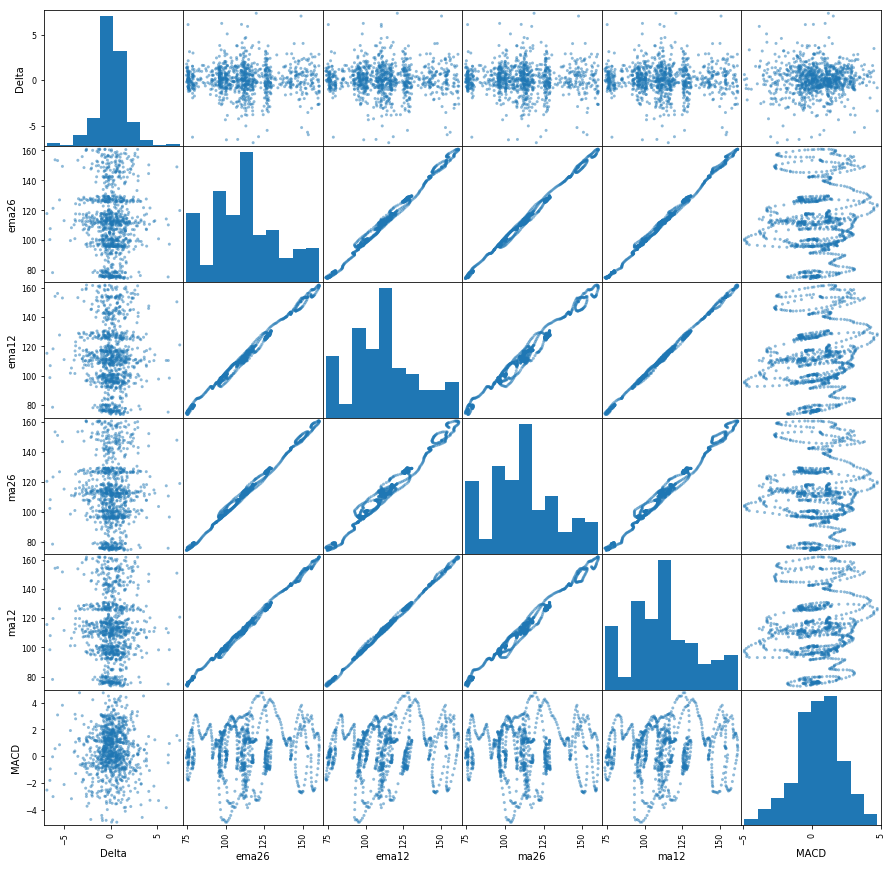

In [10]:
data=pd.DataFrame()
data['Delta']=apple['Delta_t']
data['ema26']=apple['ema26']
data['ema12']=apple['ema12']
data['ma26']=apple['ma26']
data['ma12']=apple['ma12']
data['MACD']=apple['MACD']
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.tools.plotting import scatter_matrix
sm=scatter_matrix(data,figsize=(15,15))

We can observe that, ema26, ema12, ma26 and ma12 mutually have linear pattern. none of these variables have strong linear pattern with Delta_t. 

# Problem 4. 

Using correlation to compare which signal has the largest association with price change. 

In [11]:
data.corr()

,Delta,ema26,ema12,ma26,ma12,MACD
Delta,1.000000,-0.025410,-0.024548,-0.026059,-0.024687,0.008678
ema26,-0.025410,1.000000,0.996973,0.998127,0.998535,0.055060
ema12,-0.024548,0.996973,1.000000,0.990473,0.999245,0.132524
ma26,-0.026059,0.998127,0.990473,1.000000,0.993565,-0.004538
ma12,-0.024687,0.998535,0.999245,0.993565,1.000000,0.102924
MACD,0.008678,0.055060,0.132524,-0.004538,0.102924,1.000000


ma26 seems to have highest correlation with price change, which is still weak. 